In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
import matplotlib.pyplot as plt

def generate_time_series_data(num_points): 
    t = np.linspace(0, 10, num_points)
    data = np.sin(t) + 0.1 * np.random.randn(num_points) 
    return data
    
num_points = 1000
data = generate_time_series_data(num_points)
 

sequence_length = 10 
X = []
y = []
for i in range(num_points - sequence_length): 
    X.append(data[i:i+sequence_length]) 
    y.append(data[i+sequence_length])

X = np.array(X).reshape(-1, sequence_length, 1) 
y = np.array(y)

C:\Users\pronn\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_ratio = 0.8
train_size = int(train_ratio * len(X))

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1))) 
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

loss = model.evaluate(X_test, y_test) 
print(f"Test loss: {loss:.4f}")
predictions = model.predict(X_test)

Epoch 1/20
20/20 [==============================] - 5s 61ms/step - loss: 0.1704 - val_loss: 0.0117
Epoch 2/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0117
Epoch 3/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0131 - val_loss: 0.0108
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 5/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 6/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0124 - val_loss: 0.0128
Epoch 7/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0122 - val_loss: 0.0108
Epoch 8/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 9/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 10/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0123 - val_loss: 0.0109
Epoch 11/

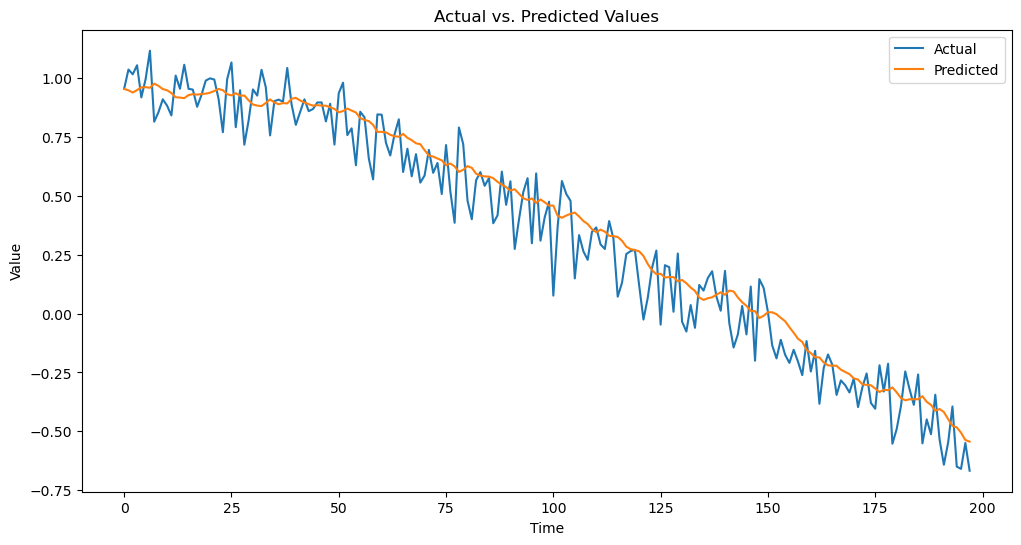

In [6]:
plt.figure(figsize=(12, 6)) 
plt.plot(y_test, label='Actual') 
plt.plot(predictions, label='Predicted') 
plt.legend()
plt.title('Actual vs. Predicted Values') 
plt.xlabel('Time')
 
plt.ylabel('Value') 
plt.show()